In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
import torch.optim as optim

# GPU ÏÇ¨Ïö© Í∞ÄÎä• Ïó¨Î∂Ä ÌôïÏù∏
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

Using device: cuda


# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [3]:
test_dir = 'test'
train_dir = 'train'

# test Ìè¥ÎçîÏóêÏÑú 5Í∞ú ÌååÏùº Ï∂úÎ†•
test_files = os.listdir(test_dir)[:5]
for file in test_files:
    print(f'- {file}')

# train Ìè¥ÎçîÏóêÏÑú 5Í∞ú ÌååÏùº Ï∂úÎ†•
train_files = os.listdir(train_dir)[:5]
for file in train_files:
    print(f'- {file}')

- 1.jpg
- 10.jpg
- 100.jpg
- 1000.jpg
- 10000.jpg
- cat.0.jpg
- cat.1.jpg
- cat.10.jpg
- cat.100.jpg
- cat.1000.jpg


# Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨
- train Ìè¥Îçî ÎÇ¥Î∂ÄÎ•º Ï†ïÎ¶¨Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏùå
  + cat, dog ÌååÏùºÎì§Î°ú Î¨∂Ïñ¥ÏÑú Í∑∏Î£πÌïÑ Ìï† ÌïÑÏöî ÏûàÏùå

In [7]:
"""
import os
import shutil

# train Ìè¥Îçî Í≤ΩÎ°ú ÏÑ§Ï†ï
train_dir = 'train'

# os.path.join(train_dir, 'cat') # train\\cat Í≤ΩÎ°ú ÏÑ§Ï†ï
os.makedirs(os.path.join(train_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dog'), exist_ok=True)
"""

In [13]:
"""
for filename in os.listdir(train_dir):
    if filename.endswith('.jpg'):
        # ÌååÏùº Ïù¥Î¶ÑÏóêÏÑú cat/dog Íµ¨Î∂Ñ
        if filename.startswith('cat'):
            # cat ÌååÏùºÏùÑ cat Ìè¥ÎçîÎ°ú Ïù¥Îèô
            src = os.path.join(train_dir, filename)
            dst = os.path.join(train_dir, 'cat', filename)
            shutil.move(src, dst)
        elif filename.startswith('dog'):
            # dog ÌååÏùºÏùÑ dog Ìè¥ÎçîÎ°ú Ïù¥Îèô
            src = os.path.join(train_dir, filename)
            dst = os.path.join(train_dir, 'dog', filename)
            shutil.move(src, dst)
"""

- ÌååÏùºÎ™Ö Î≥ÄÍ≤Ω

In [15]:
"""
import os

# train Ìè¥Îçî ÎÇ¥Ïùò catÍ≥º dog Ìè¥Îçî Í≤ΩÎ°ú ÏÑ§Ï†ï
train_dir = 'train'
cat_dir = os.path.join(train_dir, 'cat')
dog_dir = os.path.join(train_dir, 'dog')

# cat Ìè¥Îçî ÎÇ¥ ÌååÏùºÎ™Ö Î≥ÄÍ≤Ω
for filename in os.listdir(cat_dir):
    if filename.startswith('cat.'):
        # cat.0.jpg -> cat0.jpg ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω
        new_name = filename.replace('cat.', 'cat')
        old_path = os.path.join(cat_dir, filename)
        new_path = os.path.join(cat_dir, new_name)
        os.rename(old_path, new_path)

# dog Ìè¥Îçî ÎÇ¥ ÌååÏùºÎ™Ö Î≥ÄÍ≤Ω
for filename in os.listdir(dog_dir):
    if filename.startswith('dog.'):
        # dog.0.jpg -> dog0.jpg ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω
        new_name = filename.replace('dog.', 'dog')
        old_path = os.path.join(dog_dir, filename)
        new_path = os.path.join(dog_dir, new_name)
        os.rename(old_path, new_path)

print("ÌååÏùºÎ™Ö Î≥ÄÍ≤ΩÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")
"""

ÌååÏùºÎ™Ö Î≥ÄÍ≤ΩÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


# Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî

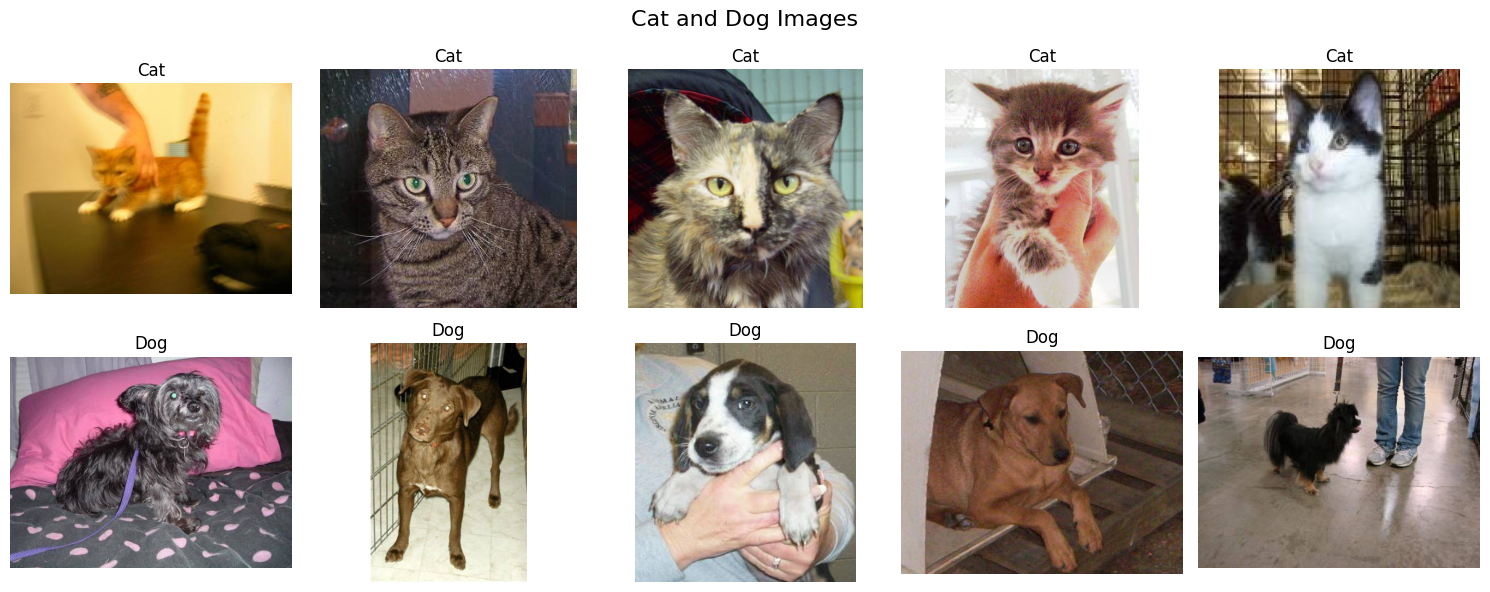

In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# train Ìè¥Îçî ÎÇ¥Ïùò catÍ≥º dog Ìè¥Îçî Í≤ΩÎ°ú ÏÑ§Ï†ï
train_dir = 'train'
cat_dir = os.path.join(train_dir, 'cat')
dog_dir = os.path.join(train_dir, 'dog')

# print(cat_dir, dog_dir)
# catÍ≥º dog Ìè¥ÎçîÏóêÏÑú Í∞ÅÍ∞Å 5Í∞úÏùò Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í∞ÄÏ†∏Ïò§Í∏∞
cat_files = os.listdir(cat_dir)[:5]
dog_files = os.listdir(dog_dir)[:5]

# 2x5 ÌÅ¨Í∏∞Ïùò figure ÏÉùÏÑ±
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Cat and Dog Images', fontsize=16)

# cat Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
for idx, filename in enumerate(cat_files):
    img_path = os.path.join(cat_dir, filename)
    img = Image.open(img_path)
    axes[0, idx].imshow(img)
    axes[0, idx].axis('off')
    axes[0, idx].set_title('Cat')

# dog Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
for idx, filename in enumerate(dog_files):
    img_path = os.path.join(dog_dir, filename)
    img = Image.open(img_path)
    axes[1, idx].imshow(img)
    axes[1, idx].axis('off')
    axes[1, idx].set_title('Dog')

plt.tight_layout()
plt.show()

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Í∏∞

## Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ•ò

In [3]:
# Data Leakage Î∞©ÏßÄ
# ÌõàÎ†®Îç∞Ïù¥ÌÑ∞/ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
import shutil
import random

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
train_dir = 'train'
cat_dir = os.path.join(train_dir, 'cat')
dog_dir = os.path.join(train_dir, 'dog')

# ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°ú ÏÉùÏÑ±
train_data_dir = 'train_data'
val_data_dir = 'val_data'

# train_dataÏôÄ val_data Ìè¥Îçî ÎÇ¥Ïóê catÍ≥º dog Ìè¥Îçî ÏÉùÏÑ±
os.makedirs(os.path.join(train_data_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(train_data_dir, 'dog'), exist_ok=True)
os.makedirs(os.path.join(val_data_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(val_data_dir, 'dog'), exist_ok=True)

# cat Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î¶¨Ïä§Ìä∏
cat_files = os.listdir(cat_dir)
# dog Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î¶¨Ïä§Ìä∏
dog_files = os.listdir(dog_dir)

In [4]:
# Î¨¥ÏûëÏúÑÎ°ú ÏÑûÍ∏∞
random.shuffle(cat_files)
random.shuffle(dog_files)

In [5]:
# 8:2 ÎπÑÏú®Î°ú Î∂ÑÌï†
cat_train_size = int(len(cat_files) * 0.8)
dog_train_size = int(len(dog_files) * 0.8)

cat_train_size, dog_train_size

(10000, 10000)

In [6]:
# train Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨
for file in cat_files[:cat_train_size]:
    src = os.path.join(cat_dir, file)
    dst = os.path.join(train_data_dir, 'cat', file)
    shutil.copy2(src, dst)

for file in dog_files[:dog_train_size]:
    src = os.path.join(dog_dir, file)
    dst = os.path.join(train_data_dir, 'dog', file)
    shutil.copy2(src, dst)

# validation Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨
for file in cat_files[cat_train_size:]:
    src = os.path.join(cat_dir, file)
    dst = os.path.join(val_data_dir, 'cat', file)
    shutil.copy2(src, dst)

for file in dog_files[dog_train_size:]:
    src = os.path.join(dog_dir, file)
    dst = os.path.join(val_data_dir, 'dog', file)
    shutil.copy2(src, dst)

- Train Îç∞Ïù¥ÌÑ∞ÏÖã
  + Cat : 10000
  + Dog : 10000
- Validation
  + Cat : 2500
  + Dog : 2500

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Í∏∞ ÎßåÎì§Í∏∞

In [7]:
def preprocess_image(image_path, transform):
    # Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å ÌõÑ, ÏãúÍ∞ÅÌôî Ìï† Îïå ÏÇ¨Ïö© ÏòàÏ†ï
    image = Image.open(image_path).convert('RGB')
    return transform(image)

## Transform Ï†ïÏùò
- ÎåÄÏõêÏπôÏùÄ Data Leakage ÏÉùÍ∞Å
  + ValidationÏùÄ Ïö∞Î¶¨Í∞Ä Î™®Î•¥Îäî Îç∞Ïù¥ÌÑ∞
    - ÏïåÍ≥†Î¶¨Ï¶òÏóê Ï†ÅÏö©Ïù¥ Í∞ÄÎä•Ìïú ÏµúÏÜåÌôîÎ°ú Ïù¥ÎØ∏ÏßÄ Î≥ÄÌòï
    - ÏòàÎ•º Îì§Î©¥
      + Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎßå Î≥ÄÍ≤Ω(ÌïÑÏàò)
      + Ïù¥ÎØ∏ÏßÄ Ï†ïÍ∑úÌôî(ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ÏôÄ ÎèôÏùºÌïú ÌòïÌÉú, ÏòµÏÖò)
  + Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌïú Î™®Îì† ÏΩîÎìúÎäî Train Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï†ÅÏö©

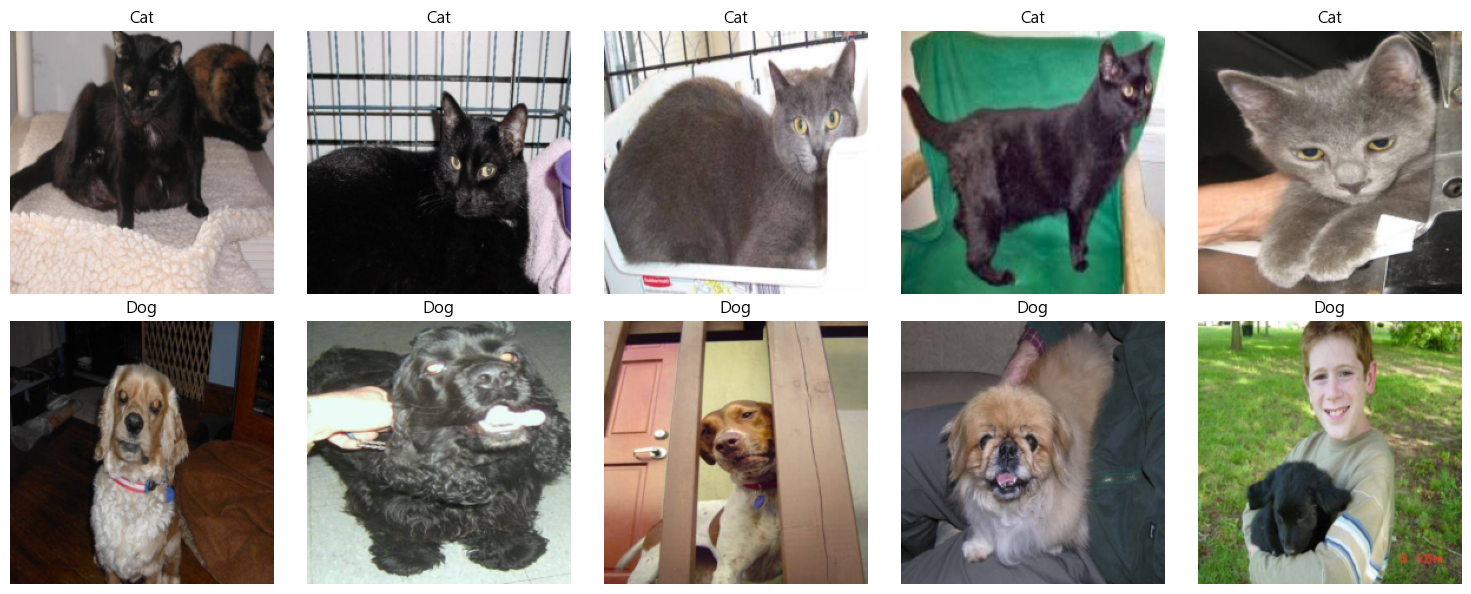

In [11]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌïú transform Ï†ïÏùò
# Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Ïù¥Ïú† : Í≥ºÏ†ÅÌï© Î∞©ÏßÄ
train_transform = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.RandomHorizontalFlip(), # Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï
    transforms.RandomRotation(10), # Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                       std=[0.229, 0.224, 0.225])
])

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú transform (Ï∂îÌõÑÏóêÎäî Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞Ïö©ÏúºÎ°ú ÌôúÏö©)
viz_transform = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor()
])

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÏÑ†ÌÉù
sample_cat_files = cat_files[:5]
sample_dog_files = dog_files[:5]

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú figure ÏÉùÏÑ±
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

# Í≥†ÏñëÏù¥ Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî
for idx, file in enumerate(sample_cat_files):
    img_path = os.path.join(cat_dir, file)
    img = preprocess_image(img_path, viz_transform)
    
    axes[idx].imshow(img.permute(1, 2, 0))
    axes[idx].set_title('Cat')
    axes[idx].axis('off')

# Í∞ïÏïÑÏßÄ Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî
for idx, file in enumerate(sample_dog_files):
    img_path = os.path.join(dog_dir, file)
    img = preprocess_image(img_path, viz_transform)
    
    axes[idx + 5].imshow(img.permute(1, 2, 0))
    axes[idx + 5].set_title('Dog')
    axes[idx + 5].axis('off')

plt.tight_layout()
plt.show()

# Îç∞Ïù¥ÌÑ∞ Î°úÎçî
- Í≥†ÏñëÏù¥ Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏ÏôÄÏÑú Ï†ÑÏ≤òÎ¶¨
- Í∞ïÏïÑÏßÄ Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏ÏôÄÏÑú Ï†ÑÏ≤òÎ¶¨
- Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶à ÌÅ¨Í∏∞ ÏÑ§Ï†ï
- Îç∞Ïù¥ÌÑ∞Î•º Î¨¥ÏûëÏúÑÎ°ú ÏÑûÎäî ÏûëÏóÖ

## Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¥ÎûòÏä§ Ï†ïÏùò

In [12]:
class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_files = [] # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ 
        self.labels = [] # yÍ∞í

        # Í≥†ÏñëÏù¥ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞, ÎùºÎ≤® 0 ÏßÄÏ†ï
        cat_dir = os.path.join(data_dir, 'cat')
        cat_files = os.listdir(cat_dir)
        self.image_files.extend([os.path.join(cat_dir, f) for f in cat_files])
        self.labels.extend([0] * len(cat_files)) # Í≥†ÏñëÏù¥: 0

        # Í∞ïÏïÑÏßÄ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞, ÎùºÎ≤® 1 ÏßÄÏ†ï
        dog_dir = os.path.join(data_dir, 'dog')
        dog_files = os.listdir(dog_dir)
        self.image_files.extend([os.path.join(dog_dir, f) for f in dog_files])
        self.labels.extend([1] * len(dog_files)) # Í∞ïÏïÑÏßÄ

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        label = self.labels[idx]

        # Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        return image, label

In [13]:
# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±, Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ÏÖã
train_dataset = CatDogDataset('train_data', transform=train_transform)
val_dataset = CatDogDataset('val_data', transform=viz_transform)

# Îç∞Ïù¥ÌÑ∞ Î°úÎçî ÏÉùÏÑ±, ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶òÏóê Îì§Ïñ¥Í∞à ÌòïÌÉúÎ°ú Îã§Ïãú Î≥ÄÌòï
train_loader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=32, 
    shuffle=True, 
    num_workers=0
)

# Îç∞Ïù¥ÌÑ∞ Î°úÎçî ÏÉùÏÑ±, ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶òÏóê Îì§Ïñ¥Í∞à ÌòïÌÉúÎ°ú Îã§Ïãú Î≥ÄÌòï
val_loader = torch.utils.data.DataLoader(
    val_dataset, 
    batch_size=32, 
    shuffle=False, 
    num_workers=0
)

# Î™®Îç∏ÎßÅ

In [14]:
# timm ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ EfficientNet Î™®Îç∏ Í∞ÄÏ†∏Ïò§Í∏∞
import timm
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# EfficientNet-B0 Î™®Îç∏ ÏÉùÏÑ±
model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=2)

# GPU ÏÇ¨Ïö© ÏÑ§Ï†ï
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# ÏÜêÏã§ Ìï®ÏàòÏôÄ ÏòµÌã∞ÎßàÏù¥Ï†Ä Ï†ïÏùò
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ÌïôÏäµ ÏãúÏûë
num_epochs = 5

# ÌïôÏäµ/Í≤ÄÏ¶ù Î©îÌä∏Î¶≠ Ï†ÄÏû•ÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏
train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(num_epochs):
    # ÌïôÏäµ Îã®Í≥Ñ
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    print(f'üîÅ Epoch {epoch+1}/{num_epochs} - Training')
    with tqdm(train_loader, desc='Train', unit='batch', leave=True) as train_pbar:
        for images, labels in train_pbar:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()
            
            train_pbar.set_postfix({
                'loss': f'{loss.item():.3f}',
                'acc': f'{100.*train_correct/train_total:.2f}%'
            })
    
    # ÏóêÌè¨ÌÅ¨Îãπ ÌèâÍ∑† ÌïôÏäµ ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
    avg_train_loss = train_loss / len(train_loader)
    avg_train_acc = 100. * train_correct / train_total
    train_losses.append(avg_train_loss)
    train_accs.append(avg_train_acc)

    # Í≤ÄÏ¶ù Îã®Í≥Ñ
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    print(f'üìä Epoch {epoch+1}/{num_epochs} - Validation')
    with torch.no_grad():
        with tqdm(val_loader, desc='Validation', unit='batch', leave=True) as val_pbar:
            for images, labels in val_pbar:
                images, labels = images.to(device), labels.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                val_pbar.set_postfix({
                    'loss': f'{val_loss/len(val_loader):.3f}',
                    'acc': f'{100.*val_correct/val_total:.2f}%'
                })
    
    # ÏóêÌè¨ÌÅ¨Îãπ ÌèâÍ∑† Í≤ÄÏ¶ù ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
    avg_val_loss = val_loss / len(val_loader)
    avg_val_acc = 100. * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accs.append(avg_val_acc)

üîÅ Epoch 1/5 - Training


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 751/751 [03:52<00:00,  3.23batch/s, loss=3.931, acc=93.84%]


üìä Epoch 1/5 - Validation


Validation: 100%|‚ñà| 282/282 [01:10<00:00,  3.97batch/s, loss=0.471, acc=73.71%]


üîÅ Epoch 2/5 - Training


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 751/751 [02:06<00:00,  5.94batch/s, loss=0.002, acc=93.51%]


üìä Epoch 2/5 - Validation


Validation: 100%|‚ñà| 282/282 [00:23<00:00, 12.21batch/s, loss=0.437, acc=75.37%]


üîÅ Epoch 3/5 - Training


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 751/751 [02:06<00:00,  5.95batch/s, loss=0.000, acc=96.73%]


üìä Epoch 3/5 - Validation


Validation: 100%|‚ñà| 282/282 [00:23<00:00, 12.03batch/s, loss=0.468, acc=72.55%]


üîÅ Epoch 4/5 - Training


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 751/751 [02:08<00:00,  5.86batch/s, loss=1.455, acc=97.65%]


üìä Epoch 4/5 - Validation


Validation: 100%|‚ñà| 282/282 [00:23<00:00, 12.06batch/s, loss=0.409, acc=78.90%]


üîÅ Epoch 5/5 - Training


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà| 751/751 [02:07<00:00,  5.89batch/s, loss=12.680, acc=95.50%]


üìä Epoch 5/5 - Validation


Validation: 100%|‚ñà| 282/282 [00:23<00:00, 11.91batch/s, loss=0.580, acc=73.16%]


## Î™®Îç∏ ÌïôÏäµ ÌôïÏù∏

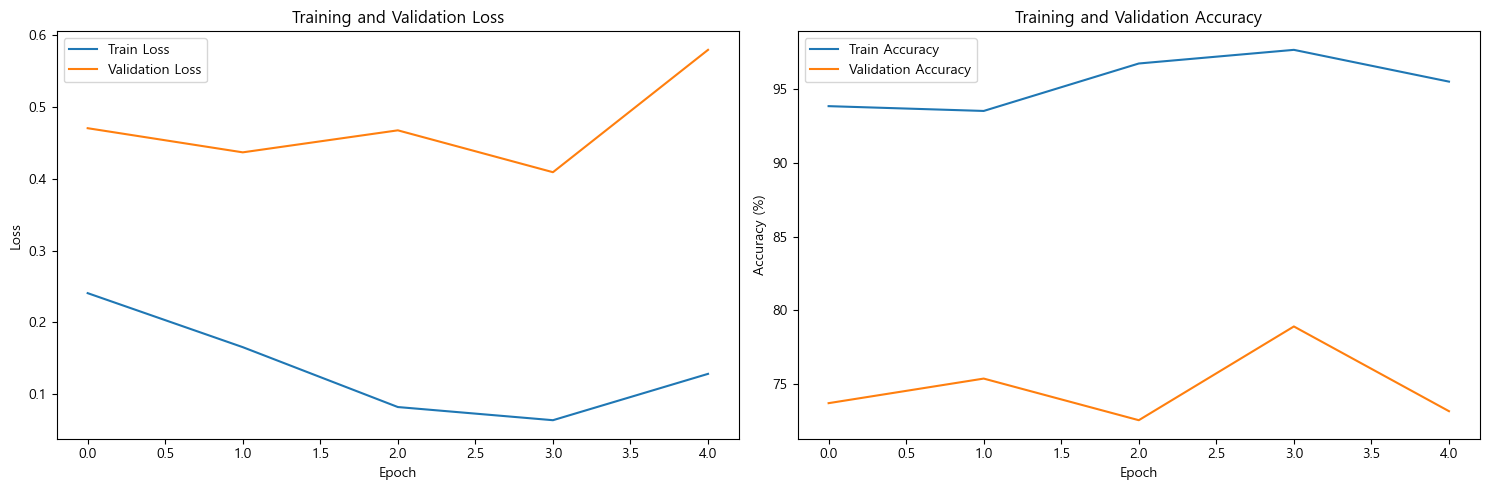

In [15]:
# ÌïôÏäµ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# ÏÜêÏã§ Í∑∏ÎûòÌîÑ
ax1.plot(train_losses, label='Train Loss')
ax1.plot(val_losses, label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
ax2.plot(train_accs, label='Train Accuracy')
ax2.plot(val_accs, label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

plt.tight_layout()
plt.show()

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÅÏö©

In [16]:
import os 
from PIL import Image
import torch 
from torchvision import transforms
from tqdm import tqdm # ÏßÑÌñâÎ•† ÎùºÏù¥Î∏åÎü¨Î¶¨
from datetime import datetime

# ÌÖåÏä§Ìä∏Ïö© transform Ï†ïÏùò 
test_transform = transforms.Compose([
    transforms.Resize([224, 224]), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                       std=[0.229, 0.224, 0.225])
])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÑ∞Î¶¨ 
test_dir = 'test'
test_files = os.listdir(test_dir)

# submission ÌååÏùºÎ™Ö ÏÉùÏÑ± 
now = datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")
submission_file = f'submission_{timestamp}.csv'
submission_file

# ÏòàÏ∏° Î∞è Ï†ÄÏû• 
with open(submission_file, 'w') as f:
    f.write('id,label\n')

    model.eval()
    with torch.no_grad():
        for filename in tqdm(test_files, desc='Testing'):
            img_path = os.path.join(test_dir, filename)
            image = Image.open(img_path).convert('RGB')
            image = test_transform(image).unsqueeze(0).to(device) # transform Ï†ÅÏö©
            outputs = model(image)
            _, predicted = outputs.max(1)
            label = predicted.item()

            id = os.path.splitext(filename)[0]
            f.write(f'{id},{label}\n')

print(f"submission file ÏÉùÏÑ±: {submission_file}")

Testing: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12500/12500 [03:00<00:00, 69.08it/s]

submission file ÏÉùÏÑ±: submission_20250609_121429.csv


# Î™®Îç∏ ÎÇ¥Î≥¥ÎÇ¥Í∏∞

In [17]:
# Î™®Îç∏ Ï†ÄÏû•
model_path = 'cat_dog_model.pth'
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')

# Î™®Îç∏ Íµ¨Ï°∞ÏôÄ Í∞ÄÏ§ëÏπòÎ•º Ìï®Íªò Ï†ÄÏû•
full_model_path = 'cat_dog_model_full.pth'
torch.save({
    'model_state_dict': model.state_dict(),
    'model_architecture': model,
    'transforms': train_transform
}, full_model_path)
print(f'Full model saved to {full_model_path}')

Model saved to cat_dog_model.pth
Full model saved to cat_dog_model_full.pth
